In [ ]:
## Setting up

# 注意⚠️
如果huggingface 无法连接，deepseek-r1-llama-8b模型和数据集无法下载。因此为了方便大家，提供一个网盘下载地址，请到该地址，即可下载模型和相应的训练数据集：
> 模型下载地址：https://pan.quark.cn/s/d45a88061e3d
> 训练数据集下载地址：https://pan.quark.cn/s/fea6a395deff

In [1]:
import torch
print(f"PyTorch 版本: {torch.__version__}")
print(f"CUDA 是否可用: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"CUDA 版本: {torch.version.cuda}")
    print(f"GPU 名称: {torch.cuda.get_device_name(0)}")

PyTorch 版本: 2.6.0+cu126
CUDA 是否可用: True
CUDA 版本: 12.6
GPU 名称: NVIDIA GeForce RTX 4060 Laptop GPU


In [ ]:
%%capture
!pip install unsloth
# Also get the latest nightly Unsloth!
!pip install --force-reinstall --no-cache-dir --no-deps git+https://github.com/unslothai/unsloth.git

In [2]:
from unsloth import FastLanguageModel
import torch
max_seq_length = 2048
dtype = None
load_in_4bit = True

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
🦥 Unsloth Zoo will now patch everything to make training faster!


## Loading the model and tokenizer

In [3]:
model, tokenizer = FastLanguageModel.from_pretrained(
    model_name = "E:/deepseek-r1-llama-8b/tmp", # 这里改成你本地模型，以我的为例，我已经huggingface上的模型文件下载到本地。
    max_seq_length = max_seq_length,
    dtype = dtype,
    load_in_4bit = load_in_4bit,
)

==((====))==  Unsloth 2025.3.18: Fast Llama patching. Transformers: 4.49.0.
   \\   /|    NVIDIA GeForce RTX 4060 Laptop GPU. Num GPUs = 1. Max memory: 7.996 GB. Platform: Windows.
O^O/ \_/ \    Torch: 2.6.0+cu126. CUDA: 8.9. CUDA Toolkit: 12.6. Triton: 3.2.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

## Model inference before fine-tuning

In [4]:
prompt_style = """Below is an instruction that describes a task, paired with an input that provides further context.
Write a response that appropriately completes the request.
Before answering, think carefully about the question and create a step-by-step chain of thoughts to ensure a logical and accurate response.

### Instruction:
You are a medical expert with advanced knowledge in clinical reasoning, diagnostics, and treatment planning.
Please answer the following medical question.

### Question:
{}

### Response:
<think>{}"""

In [5]:
question = "淡棕色背景上，沟嵴模式伴粟粒样囊肿、粉刺样开口，黄白色鳞屑。"


FastLanguageModel.for_inference(model)  # Unsloth has 2x faster inference!
inputs = tokenizer([prompt_style.format(question, "")], return_tensors="pt").to("cuda")

outputs = model.generate(
    input_ids=inputs.input_ids,
    attention_mask=inputs.attention_mask,
    max_new_tokens=1200,
    use_cache=True,
)
response = tokenizer.batch_decode(outputs)
print(response[0].split("### Response:")[1])



<think>
好的，我现在需要解决这个医疗问题。首先，问题描述是在淡棕色背景上，沟嵴模式伴粟粒样囊肿、粉刺样开口，黄白色鳞屑。作为一个医疗专业人士，我需要逐一分析这些信息，找出可能的诊断。

首先，淡棕色背景可能是什么原因引起的？这可能是皮肤的正常色泽，或者可能与某种疾病有关，比如囊肿或其他皮肤异常有关。接下来，沟嵴模式是什么？沟嵴模式通常指皮肤的表面特征，可能是指皮肤的纹理或结构异常，比如皮肤的纹理变为沟壑状，可能与某种皮肤病有关。

粟粒样囊肿，听起来像是囊肿，形状像粟粒，可能位于皮肤下层组织中。粉刺样开口，可能是指囊肿的开口部分有粉刺物质，可能有异物或感染的情况。黄白色鳞屑，通常是皮肤表层的异常，可能是皮肤炎症或皮肤干燥。

接下来，考虑可能的诊断。首先想到的是皮肤囊肿，但描述中有多个症状，可能需要综合考虑。另一种可能是皮肤干燥症，尤其是黄白色鳞屑常见于干燥皮肤。然而，沟嵴模式和粟粒样囊肿可能更倾向于皮肤病变。

再考虑皮肤干燥症的表现：皮肤干燥、剥脱、鳞屑、瘙痒等。淡棕色背景可能是皮肤正常色泽，或者是皮肤病变的颜色变化，比如黄色可能与皮肤瘙痒或皮炎有关。

还有，皮肤干燥症常伴有皮肤裂解，是否有这种情况呢？问题中没有提到，但可能需要进一步询问。

另外，考虑是否为湿疹：湿疹通常呈红色或紫色，皮肤屑多为红色或灰色，不一定是黄白色。湿疹也有水泡，可能与粟粒样囊肿相符，但颜色不符。

再考虑银屑病：银屑病有黄色鳞屑，皮肤干燥，可能伴有瘙痒，但银屑病通常呈红色皮炎，皮肤屑多为灰色或黑色，黄色较少。

还有，皮肤干燥症可能与感染或过敏有关，是否有过敏史呢？问题中没有提到。

另外，考虑是否为皮肤干燥伴纤维化，或者其他皮肤干燥变体，但可能性较低。

综合以上分析，最可能的诊断是皮肤干燥症，表现为黄白色鳞屑，伴有瘙痒，皮肤剥脱，可能有微小的囊肿或开口，导致粟粒样囊肿和粉刺样开口。淡棕色背景可能是皮肤正常色泽或皮肤病变的颜色变化。

接下来，考虑治疗方案：皮肤干燥症的治疗通常包括保湿、止痒、使用外用药物如激素类或抗生素，避免过度干燥。如果伴有感染，可能需要抗生素治疗。长期治疗可能需要激素类药物。

是否需要进一步检查呢？可能需要皮肤屑的细菌培养、病理检查，或者皮肤科医生的详细检查，以确定是否有感染或其他皮肤病变。

总结：最可能的诊断是皮肤干燥症，伴有黄白色鳞屑、粟粒样

In [5]:
model = FastLanguageModel.get_peft_model(
    model,
    r=16,
    target_modules=[
        "q_proj",
        "k_proj",
        "v_proj",
        "o_proj",
        "gate_proj",
        "up_proj",
        "down_proj",
    ],
    lora_alpha=16,
    lora_dropout=0,
    bias="none",
    use_gradient_checkpointing="unsloth",  # True or "unsloth" for very long context
    random_state=3407,
    use_rslora=False,
    loftq_config=None,
)


Unsloth 2025.3.18 patched 32 layers with 32 QKV layers, 32 O layers and 32 MLP layers.


## Loading and processing the dataset

In [6]:
train_prompt_style = """Below is an instruction that describes a task, paired with an input that provides further context.
Write a response that appropriately completes the request.
Before answering, think carefully about the question and create a step-by-step chain of thoughts to ensure a logical and accurate response.

### Instruction:
You are a medical expert with advanced knowledge in clinical reasoning, diagnostics, and treatment planning.
Please answer the following medical question.

### Question:
{}

### Response:
<think>
{}
</think>
{}"""


In [7]:
EOS_TOKEN = tokenizer.eos_token  # Must add EOS_TOKEN


def formatting_prompts_func(examples):
    inputs = examples["Question"]
    cots = examples["Complex_CoT"]
    outputs = examples["Response"]
    texts = []
    for input, cot, output in zip(inputs, cots, outputs):
        text = train_prompt_style.format(input, cot, output) + EOS_TOKEN
        texts.append(text)
    return {
        "text": texts,
    }


In [8]:
######################
# 1. 数据集拆分 & 预处理
######################
from datasets import load_dataset

data_path = "E:/Deepseek/data_sorce/HZ/medical_data_with_cot_reasoner_610.json"

raw_dataset = load_dataset("json", data_files={"data": data_path})

split_dataset = raw_dataset["data"].train_test_split(
    test_size=0.3,
    seed=3407,
    shuffle=True
)

train_raw = split_dataset["train"]
test_raw  = split_dataset["test"]

train_dataset = train_raw.map(formatting_prompts_func, batched=True)
test_dataset  = test_raw.map(formatting_prompts_func,  batched=True)

print(f"Train set size: {len(train_dataset)}")
print(f"Test  set size: {len(test_dataset)}")

Train set size: 427
Test  set size: 183


## Setting up the model

In [9]:
######################
# 2. 配置 SFTTrainer
######################
from trl import SFTTrainer
from transformers import TrainingArguments, EarlyStoppingCallback
from unsloth import is_bfloat16_supported

training_args = TrainingArguments(
    output_dir          = "outputs",
    # —— 批量 & 累积 —— #
    per_device_train_batch_size = 2,
    gradient_accumulation_steps = 4,
    # —— 训练时长：按 epoch 跑 —— #
    num_train_epochs    = 3,          # 数据几百–几千条，2–3 轮最常用
    # —— 评估与保存 —— #
    evaluation_strategy = "steps",
    eval_steps          = 10,         # 每 10 step 在测试集上评估一次
    save_strategy       = "steps",
    save_steps          = 10,
    load_best_model_at_end = True,
    metric_for_best_model = "eval_loss",
    greater_is_better   = False,
    # —— 优化器&LR —— #
    warmup_steps        = 5,
    learning_rate       = 2e-4,
    fp16                = not is_bfloat16_supported(),
    bf16                = is_bfloat16_supported(),
    optim               = "adamw_8bit",
    weight_decay        = 0.01,
    lr_scheduler_type   = "linear",
    # —— 其余 —— #
    logging_steps       = 10,
    seed                = 3407,
)

trainer = SFTTrainer(
    model              = model,
    tokenizer          = tokenizer,
    train_dataset      = train_dataset,
    eval_dataset       = test_dataset,
    dataset_text_field = "text",
    max_seq_length     = max_seq_length,
    dataset_num_proc   = 1,
    args               = training_args,
    callbacks          = [
        EarlyStoppingCallback(early_stopping_patience=3)  # 连续 3 次 eval_loss 无提升则停止
    ],
)

E:\python\anaconda\envs\deepseek-8b\Lib\site-packages\transformers\training_args.py:1594: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


## Model training

In [ ]:
trainer_stats = trainer.train()

==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 427 | Num Epochs = 3 | Total steps = 159
O^O/ \_/ \    Batch size per device = 2 | Gradient accumulation steps = 4
\        /    Data Parallel GPUs = 1 | Total batch size (2 x 4 x 1) = 8
 "-____-"     Trainable parameters = 41,943,040/4,582,543,360 (0.92% trained)
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: 3033715462 (3033715462-) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Unsloth: Will smartly offload gradients to save VRAM!


Step,Training Loss,Validation Loss


所有损失数据已保存到: E:\Deepseek\deepseek-r1-llama-8b-main\all_loss_610.csv


C:\Users\刘翔\AppData\Local\Temp\ipykernel_14448\2848135212.py:49: UserWarning: Glyph 27493 (\N{CJK UNIFIED IDEOGRAPH-6B65}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\刘翔\AppData\Local\Temp\ipykernel_14448\2848135212.py:49: UserWarning: Glyph 39588 (\N{CJK UNIFIED IDEOGRAPH-9AA4}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\刘翔\AppData\Local\Temp\ipykernel_14448\2848135212.py:49: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\刘翔\AppData\Local\Temp\ipykernel_14448\2848135212.py:49: UserWarning: Glyph 25439 (\N{CJK UNIFIED IDEOGRAPH-635F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\刘翔\AppData\Local\Temp\ipykernel_14448\2848135212.py:49: UserWarning: Glyph 22833 (\N{CJK UNIFIED IDEOGRAPH-5931}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\刘翔\AppData\Local\Temp\ipykernel_14448\2848135212.py:49: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEO

损失曲线图已保存到: E:\Deepseek\deepseek-r1-llama-8b-main\loss_curve_610.png


E:\python\anaconda\envs\deepseek-8b\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25439 (\N{CJK UNIFIED IDEOGRAPH-635F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
E:\python\anaconda\envs\deepseek-8b\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 22833 (\N{CJK UNIFIED IDEOGRAPH-5931}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
E:\python\anaconda\envs\deepseek-8b\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
E:\python\anaconda\envs\deepseek-8b\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 35757 (\N{CJK UNIFIED IDEOGRAPH-8BAD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
E:\python\anaconda\envs\deepseek-8b\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 32451 (\N{CJK U

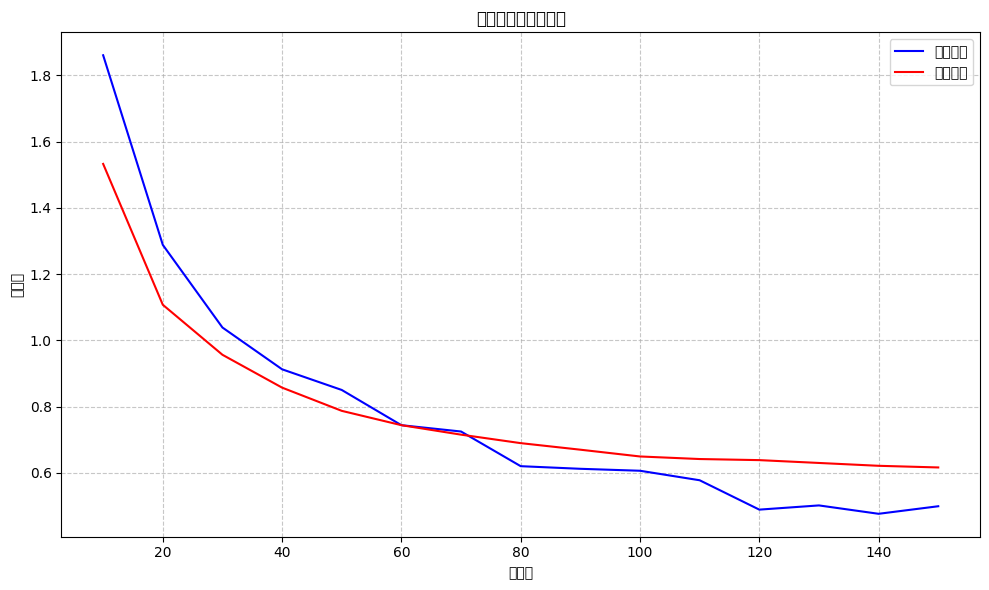

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import os

# 提取训练和测试损失数据
log_history = trainer.state.log_history
train_steps, train_losses = [], []
eval_steps, eval_losses = [], []

for r in log_history:
    if "loss" in r:
        train_steps.append(r["step"])
        train_losses.append(r["loss"])
    if "eval_loss" in r:
        eval_steps.append(r["step"])
        eval_losses.append(r["eval_loss"])

# 创建两个单独的DataFrame
train_df = pd.DataFrame({
    'step': train_steps,
    'loss': train_losses,
    'type': ['train'] * len(train_steps)
})

eval_df = pd.DataFrame({
    'step': eval_steps,
    'loss': eval_losses,
    'type': ['eval'] * len(eval_steps)
})

# 合并两个DataFrame
all_data = pd.concat([train_df, eval_df], ignore_index=True)

# 保存到一个CSV文件
csv_path = 'all_loss.csv'
all_data.to_csv(csv_path, index=False)

print(f"所有损失数据已保存到: {os.path.abspath(csv_path)}")

# 绘制损失曲线图
plt.figure(figsize=(10, 6))
plt.plot(train_steps, train_losses, 'b-', label="train_loss")
plt.plot(eval_steps, eval_losses, 'r-', label="eval_loss")
plt.xlabel("step")
plt.ylabel("loss")
plt.title("train Vs. eval loss")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# 保存图像
fig_path = 'loss_curve.png'
plt.savefig(fig_path, dpi=300)
print(f"损失曲线图已保存到: {os.path.abspath(fig_path)}")

# 显示图像
plt.show()

In [13]:
question = "根据检查所见：淡棕色背景上，沟嵴模式伴粟粒样囊肿、粉刺样开口，黄白色鳞屑。可以得到一个什么样的结果"

FastLanguageModel.for_inference(model)  # Unsloth has 2x faster inference!

# Fix the format string to include all three arguments needed
# The error was happening because you only provided one argument to a format string expecting three
inference_prompt = train_prompt_style.format(
    question,  # Question
    "",        # Empty CoT for inference
    ""         # Empty Response for inference
)

inputs = tokenizer([inference_prompt], return_tensors="pt").to("cuda")

outputs = model.generate(
    input_ids=inputs.input_ids,
    attention_mask=inputs.attention_mask,
    max_new_tokens=1200,
    use_cache=True,
)
response = tokenizer.batch_decode(outputs)
print(response[0].split("### Response:")[1])


<think>
### 推理链：

1. **观察皮损颜色**：
   - 黄色无结构区域提示存在角化过度或皮脂分泌物积聚，这是常见于脂溢性角化病的表现。
   - 黄色区域的“无结构”特征可能提示角栓或角化物质的堆积。

2. **分析皮损边缘**：
   - 少量不规则分布的红色、褐色、黑色、点状/线状出血提示存在皮肤屏障受损或真皮乳头层血管破裂。
   - 出血颜色多为黑色和褐色，可能与角化过度导致的真皮乳头压迫性出血有关。

3. **疣状突起的解读**：
   - 皮损内疣状突起提示表皮增生性改变，可能与角化病的增生性趋势相关。
   - 疣状突起是脂溢性角化病的典型特征之一，表现为表皮乳头层增生。

4. **角化明显的意义**：
   - 角化明显提示表皮增厚或角质层异常增生，这与脂溢性角化病的病理机制一致。
   - 脂溢性角化病的形成机制包括皮脂腺分泌过多、表皮角化过度和外伤等因素。

5. **皮肤镜像特征的综合分析**：
   - 黄色无结构区域 → 脂溢性角化病的角化过度表现。
   - 红色、褐色、黑色点状/线状出血 → 表皮屏障受损或真皮乳头层血管破裂。
   - 疣状突起 → 表皮增生性改变。
   - 角化明显 → 表皮角化过度。

6. **鉴别诊断**：
   - 脂溢性角化病的典型表现为黄色鳞屑皮肤病样改变、疣状突起和角化过度。
   - 需要排除其他角化性皮肤病（如扁平苔藓、银屑病等），但皮肤镜像特征更倾向于脂溢性角化病。

7. **临床结合的必要性**：
   - 皮肤镜像特征需要结合病史（如家族史、触诊特征）和其他检查（如真菌镜检、活检）进一步确认。
   - 但目前提供的信息（皮肤镜像特征）已高度提示脂溢性角化病。

8. **结论**：
   - 综合皮肤镜像特征（黄色无结构区域、疣状突起、角化明显及出血表现），最可能的诊断是脂溢性角化病。
   - 但最终诊断需结合临床病史和其他检查结果确认。
</think>
: 符合脂溢性角化病皮肤镜像，诊断请结合临床。<｜end▁of▁sentence｜>


## Saving the model locally

In [ ]:
# new_model_online = "kingabzpro/DeepSeek-R1-Medical-COT"
new_model_local = "DeepSeek-R1-Medical-COT"
model.save_pretrained(new_model_local) # Local saving
tokenizer.save_pretrained(new_model_local)